# Using mysql library to enable python to access MySQL databases

In [1]:
# Install library 
!pip install mysql-connector-python

In [17]:
from mysql.connector import connect

# Connect to MySQL server
db = connect(
    host='localhost',
    user='hamed',
    password='NewPass123!'
)

if db.is_connected():
    print("Connected to MySQL server")

Connected to MySQL server


In [18]:
# Create a cursor object
cursor = db.cursor()

In [19]:
# Send a query for showing databases
cursor.execute("SHOW DATABASES")

# Fetch and print all results
databases = cursor.fetchall()
for database in databases:
    print(database[0])

information_schema
mysql
performance_schema
sys


# Create a database

In [20]:
# Send a query for creating database
db_name = 'online_shop'
qu_cr_db =f"""
CREATE DATABASE IF NOT EXISTS {db_name}
"""
cursor.execute(qu_cr_db)
print (f'A database named {db_name} created successfully')
print ('\n ')
print ('#'*70)
print ('\n ')


# Send a query for showing databases
qu_sh_db = """SHOW DATABASES"""
cursor.execute(qu_sh_db)
databases = cursor.fetchall()
for database in databases:
    print(database[0])

A database named online_shop created successfully

 
######################################################################

 
information_schema
mysql
online_shop
performance_schema
sys


# Drop a database

In [7]:
# Send a query for dropping databases
db_name = 'online_shop'
qu_dr_db =f"""
DROP DATABASE {db_name}
"""
cursor.execute(qu_dr_db)
db.commit()
print (f'A database named {db_name} dropped successfully')
print ('\n ')
print ('#'*70)
print ('\n ')

# Send a query for showing databases
qu_sh_db = """SHOW DATABASES"""
cursor.execute(qu_sh_db)
databases = cursor.fetchall()
print('Database names:\n')
for database in databases:
    print(database[0])


A database named online_shop dropped successfully

 
######################################################################

 
Database names:

information_schema
mysql
performance_schema
sys


In [21]:
# Send a query for creating database
db_name = 'online_shop'
qu_cr_db =f"""
CREATE DATABASE IF NOT EXISTS {db_name}
"""
cursor.execute(qu_cr_db)
print (f'A database named {db_name} created successfully')
print ('\n ')
print ('#'*70)
print ('\n ')


# Send a query for showing databases
qu_sh_db = """SHOW DATABASES"""
cursor.execute(qu_sh_db)
databases = cursor.fetchall()
for database in databases:
    print(database[0])

A database named online_shop created successfully

 
######################################################################

 
information_schema
mysql
online_shop
performance_schema
sys


# Use online_shop database

In [22]:
db_name = 'online_shop'
qu_use =f"""
USE {db_name}
"""
cursor.execute(qu_use)


# Verify which database is selected
qu_sel = """
SELECT DATABASE()
"""
cursor.execute(qu_sel)
current_db = cursor.fetchone()[0]
print(f"Currently using database: {current_db}")

Currently using database: online_shop


# if we want to start our file from first we can use below command

In [23]:
from mysql.connector import connect
db_name = 'online_shop'
# Connect to MySQL server
db = connect(
    host="localhost",
    user="hamed",
    password="NewPass123!",
    database=db_name   # <--- select DB at connection time
)

if db.is_connected():
    print("Connected to MYSQL server")

# Create a cursor object
cursor = db.cursor()

# Verify which database is selected
qu_sel = """
SELECT DATABASE()
"""
cursor.execute(qu_sel)
current_db = cursor.fetchone()[0]
print(f"Currently using database: {current_db}")

Connected to MYSQL server
Currently using database: online_shop


# Show tables

In [99]:
db_name = 'online_shop'
qu_sh_tab = """
SHOW TABLES
"""
cursor.execute(qu_sh_tab)
tables = cursor.fetchall()
print(f"Tables in {db_name}:\n")
for table in tables:
    print (table[0])

Tables in online_shop:



# Create a table

In [100]:
# Create users table
db_name = 'online_shop'
table_name = 'users1'
columns = """
            (id int primary key auto_increment,
            username varchar(50) unique,
            email varchar(100),
            registration_data date);
"""
qu_tab = f"""
            CREATE TABLE IF NOT EXISTS {table_name} {columns}
"""
cursor.execute(qu_tab)
print(f"Table named {table_name}, created successfully in {db_name} ")


Table named users1, created successfully in online_shop 


# Show tables

In [101]:
db_name = 'online_shop'
qu_sh_tab = """
SHOW TABLES
"""
cursor.execute(qu_sh_tab)
tables = cursor.fetchall()
print(f"Tables in {db_name}:\n")
for table in tables:
    print (table[0])

Tables in online_shop:

users1


# Mistake table name should be user
# Change it from user1 into user

In [102]:
# Old and new table names
old_name = 'users1'
new_name = 'users'

# SQL query to rename the table
query_rename_table = f"RENAME TABLE {old_name} TO {new_name};"

# Execute the query
cursor.execute(query_rename_table)
db.commit()

print(f"Table renamed from {old_name} to {new_name}\n")

db_name = 'online_shop'
qu_sh_tab = """
SHOW TABLES
"""
cursor.execute(qu_sh_tab)
tables = cursor.fetchall()
print(f"Tables in {db_name}:\n")
for table in tables:
    print (table[0])


Table renamed from users1 to users

Tables in online_shop:

users


# Describe the table structure = show its columns

In [103]:
db_name = 'online_shop'
table_name = 'users'
qu_col_tab = f"""
                DESCRIBE {table_name}
"""
cursor.execute(qu_col_tab)
columns = cursor.fetchall()
print(f"\nStructure of {table_name} table:")
for column in columns:
    print(column)


Structure of users table:
('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('username', 'varchar(50)', 'YES', 'UNI', None, '')
('email', 'varchar(100)', 'YES', '', None, '')
('registration_data', 'date', 'YES', '', None, '')


# Mistake column's name should be registration_date
# Change it from registration_data into registration_date

In [104]:
table_name = 'users'
# Old and new tcolumn names
old_name = 'registration_data'
new_name = 'registration_date'

# SQL query to rename the table
query_rename_column = f"ALTER TABLE {table_name} RENAME COLUMN {old_name} TO {new_name};"

# Execute the query
cursor.execute(query_rename_column )
db.commit()

print(f"Column renamed from {old_name} to {new_name} in {table_name} table \n")

db_name = 'online_shop'
table_name = 'users'
qu_col_tab = f"""
                DESCRIBE {table_name}
"""
cursor.execute(qu_col_tab)
columns = cursor.fetchall()
print(f"\nStructure of {table_name} table:")
for column in columns:
    print(column)

Column renamed from registration_data to registration_date in users table 


Structure of users table:
('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('username', 'varchar(50)', 'YES', 'UNI', None, '')
('email', 'varchar(100)', 'YES', '', None, '')
('registration_date', 'date', 'YES', '', None, '')


# Define Abbreviation key for cursor.execute

In [25]:
cux = cursor.execute

# Show all rows in the table

In [106]:
table_name = 'users'
qu_row_tab = f"""
                SELECT * FROM {table_name}
"""

cux(qu_row_tab)
rows = cursor.fetchall()
print (f"\nContent of {table_name} table:\n")
for row in rows:
    print(row)


Content of users table:



# Insert sample data to test

In [107]:
# Table name
table_name = 'users'

# Data insert to columns
data_columns = """
                    (username, email,registration_date)
"""
# Data to insert (list of tuples)
value_users =[
    ('ali123', 'ali@example.com', '2023-01-10'),
    ('sara_k', 'sara@example.com', '2023-03-15'),
    ("hamed123", "hamed@example.com","2025-08-25" )
    ]

# SQL query with placeholders (%s)
query_users= f"""
INSERT INTO {table_name} {data_columns}
VALUES (%s,%s,%s)
"""

# Execute many rows at once
cursor.executemany(query_users, value_users)

# Commit changes
db.commit()

print(cursor.rowcount, f"rows inserted into {table_name} table")


3 rows inserted into users table


# Define Abbreviation key for cursor.executemany

In [24]:
cuxm = cursor.executemany

In [109]:
table_name = 'users'
qu_row_tab = f"""
                SELECT * FROM {table_name}
"""

cux(qu_row_tab)
rows = cursor.fetchall()
print (f"\nContent of {table_name} table:\n")
for row in rows:
    print(row)


Content of users table:

(1, 'ali123', 'ali@example.com', datetime.date(2023, 1, 10))
(2, 'sara_k', 'sara@example.com', datetime.date(2023, 3, 15))
(3, 'hamed123', 'hamed@example.com', datetime.date(2025, 8, 25))


# Change values in some columns

In [110]:
# Table name
table_name = 'users'

# Update query
query_update = f"""
UPDATE {table_name}
SET email = %s, registration_date = %s
WHERE username = %s;
"""

# Data to update
data_update = ('hamed@yyy.com', '2024-08-25', 'hamed123')

# Execute the update
cux(query_update, data_update)
db.commit()

print(cursor.rowcount, "row(s) updated.\n")

qu_row_tab = f"""
                SELECT * FROM {table_name}
"""

cux(qu_row_tab)
rows = cursor.fetchall()
print (f"\nContent of {table_name} table:\n")
for row in rows:
    print(row)


1 row(s) updated.


Content of users table:

(1, 'ali123', 'ali@example.com', datetime.date(2023, 1, 10))
(2, 'sara_k', 'sara@example.com', datetime.date(2023, 3, 15))
(3, 'hamed123', 'hamed@yyy.com', datetime.date(2024, 8, 25))


# Delete a row

In [111]:
# Delete the row where username is 'hamed123'

# Table name
table_name = 'users'

# Update query
query_delete_row = f"DELETE FROM {table_name} WHERE username = %s"

username = ('hamed123',) 
cux( query_delete_row, username)


db.commit()  # Commit the changes
print("Row deleted successfully!")

cux(qu_row_tab)
rows = cursor.fetchall()
print (f"\nContent of {table_name} table:\n")
for row in rows:
    print(row)


Row deleted successfully!

Content of users table:

(1, 'ali123', 'ali@example.com', datetime.date(2023, 1, 10))
(2, 'sara_k', 'sara@example.com', datetime.date(2023, 3, 15))


# Drop table

In [29]:
# Send a query for dropping a table
table_name = 'users'
qu_dr_tab =f"""
DROP TABLE {table_name}
"""
cux(qu_dr_tab)
db.commit()
print (f'A table named {table_name} dropped successfully')
print ('\n ')
print ('#'*70)
print ('\n ')

# Send a query for showing dtables
db_name = 'online_shop'
qu_sh_tab = """
SHOW TABLES
"""
cursor.execute(qu_sh_tab)
tables = cursor.fetchall()
print(f"Tables in {db_name}:\n")
for table in tables:
    print (table[0])


A table named users dropped successfully

 
######################################################################

 
Tables in online_shop:



# create again users table

In [30]:
# Create users table
db_name = 'online_shop'
table_name = 'users'
columns = """
            (id int primary key auto_increment,
            username varchar(50) unique,
            email varchar(100),
            registration_date date);
"""
qu_tab = f"""
            CREATE TABLE IF NOT EXISTS {table_name} {columns}
"""
cux(qu_tab)
print(f"Table named {table_name}, created successfully in {db_name} ")


db_name = 'online_shop'
table_name = 'users'
qu_col_tab = f"""
                DESCRIBE {table_name}
"""
cux(qu_col_tab)
columns = cursor.fetchall()
print(f"\nStructure of {table_name} table:")
for column in columns:
    print(column)

Table named users, created successfully in online_shop 

Structure of users table:
('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('username', 'varchar(50)', 'YES', 'UNI', None, '')
('email', 'varchar(100)', 'YES', '', None, '')
('registration_date', 'date', 'YES', '', None, '')


In [31]:
# Table name
table_name = 'users'

# Data insert to columns
data_columns = """
                    (username, email,registration_date)
"""
# Data to insert (list of tuples)
value_users =[
    ('ali123', 'ali@example.com', '2023-01-10'),
    ('sara_k', 'sara@example.com', '2023-03-15'),
    ]

# SQL query with placeholders (%s)
query_users= f"""
INSERT INTO {table_name} {data_columns}
VALUES (%s,%s,%s)
"""

# Execute many rows at once
cuxm(query_users, value_users)

# Commit changes
db.commit()

print(cursor.rowcount, f"rows inserted into {table_name} table")
qu_row_tab = f"""
                SELECT * FROM {table_name}
"""
cux(qu_row_tab)
rows = cursor.fetchall()
print (f"\nContent of {table_name} table:\n")
for row in rows:
    print(row)


2 rows inserted into users table

Content of users table:

(1, 'ali123', 'ali@example.com', datetime.date(2023, 1, 10))
(2, 'sara_k', 'sara@example.com', datetime.date(2023, 3, 15))


# Create category table

In [32]:
# Create users table
db_name = 'online_shop'
table_name = 'categories'
columns = """
            (id int primary key auto_increment,
            category_name varchar(50));
"""
qu_tab = f"""
            CREATE TABLE IF NOT EXISTS {table_name} {columns}
"""
cux(qu_tab)
print(f"Table named {table_name}, created successfully in {db_name} \n")


# Send a query for showing dtables
db_name = 'online_shop'
qu_sh_tab = """
SHOW TABLES
"""
cux(qu_sh_tab)
tables = cursor.fetchall()
print(f"Tables in {db_name}:\n")
for table in tables:
    print (table[0])



qu_col_tab = f"""
                DESCRIBE {table_name}
"""
cux(qu_col_tab)
columns = cursor.fetchall()
print(f"\nStructure of {table_name} table:")
for column in columns:
    print(column)

Table named categories, created successfully in online_shop 

Tables in online_shop:

categories
users

Structure of categories table:
('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('category_name', 'varchar(50)', 'YES', '', None, '')


# Create products table

In [33]:
# Create products table

db_name = 'online_shop'
table_name = 'products'

columns = """
            (id int primary key auto_increment,
            product_name varchar(50),
            price decimal(10,2),
            stock int,
            category_id int,
            foreign key (category_id) references categories(id));
"""
qu_tab = f"""
            CREATE TABLE IF NOT EXISTS {table_name} {columns}
"""
cux(qu_tab)
print(f"Table named {table_name}, created successfully in {db_name} \n")


# Send a query for showing dtables
qu_sh_tab = """
SHOW TABLES
"""
cux(qu_sh_tab)
tables = cursor.fetchall()
print(f"Tables in {db_name}:\n")
for table in tables:
    print (table[0])



qu_col_tab = f"""
                DESCRIBE {table_name}
"""
cux(qu_col_tab)
columns = cursor.fetchall()
print(f"\nStructure of {table_name} table:")
for column in columns:
    print(column)


Table named products, created successfully in online_shop 

Tables in online_shop:

categories
products
users

Structure of products table:
('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('product_name', 'varchar(50)', 'YES', '', None, '')
('price', 'decimal(10,2)', 'YES', '', None, '')
('stock', 'int', 'YES', '', None, '')
('category_id', 'int', 'YES', 'MUL', None, '')


# Create orders table

In [34]:
# Create orders table

db_name = 'online_shop'
table_name = 'orders'
columns = """
            (id int primary key auto_increment,
             user_id int,
             order_date datetime,
             status enum('pending','shipped','delivered','cancelled'),
             foreign key (user_id) references users(id));
            
"""
qu_tab = f"""
            CREATE TABLE IF NOT EXISTS {table_name} {columns}
"""
cux(qu_tab)
print(f"Table named {table_name}, created successfully in {db_name} \n")


# Send a query for showing dtables
qu_sh_tab = """
SHOW TABLES
"""
cux(qu_sh_tab)
tables = cursor.fetchall()
print(f"Tables in {db_name}:\n")
for table in tables:
    print (table[0])



qu_col_tab = f"""
                DESCRIBE {table_name}
"""
cux(qu_col_tab)
columns = cursor.fetchall()
print(f"\nStructure of {table_name} table:")
for column in columns:
    print(column)




Table named orders, created successfully in online_shop 

Tables in online_shop:

categories
orders
products
users

Structure of orders table:
('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('user_id', 'int', 'YES', 'MUL', None, '')
('order_date', 'datetime', 'YES', '', None, '')
('status', "enum('pending','shipped','delivered','cancelled')", 'YES', '', None, '')


# Create order items table

In [35]:
# Create order items table

db_name = 'online_shop'
table_name = 'order_items'
columns = """
            (id int primary key auto_increment,
            order_id int,
            product_id int,
            quantity int,
            price_each decimal(10,2),
            foreign key (order_id) references orders(id),
            foreign key (product_id) references products(id));

"""
qu_tab = f"""
            CREATE TABLE IF NOT EXISTS {table_name} {columns}
"""
cux(qu_tab)
print(f"Table named {table_name}, created successfully in {db_name} \n")


# Send a query for showing dtables
qu_sh_tab = """
SHOW TABLES
"""
cux(qu_sh_tab)
tables = cursor.fetchall()
print(f"Tables in {db_name}:\n")
for table in tables:
    print (table[0])



qu_col_tab = f"""
                DESCRIBE {table_name}
"""
cux(qu_col_tab)
columns = cursor.fetchall()
print(f"\nStructure of {table_name} table:")
for column in columns:
    print(column)

Table named order_items, created successfully in online_shop 

Tables in online_shop:

categories
order_items
orders
products
users

Structure of order_items table:
('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('order_id', 'int', 'YES', 'MUL', None, '')
('product_id', 'int', 'YES', 'MUL', None, '')
('quantity', 'int', 'YES', '', None, '')
('price_each', 'decimal(10,2)', 'YES', '', None, '')


# Create payments table

In [36]:
# Create payments table
db_name = 'online_shop'
table_name = 'payments'
columns = """
            (id int primary key auto_increment,
            order_id int,
            payment_date datetime,
            amount decimal(10,2),
            method enum("credit_card", "paypal", "cash"),
            status enum("paid","unpaid"),
            foreign key (order_id) references orders(id));

"""
qu_tab = f"""
            CREATE TABLE IF NOT EXISTS {table_name} {columns}
"""
cux(qu_tab)
print(f"Table named {table_name}, created successfully in {db_name} \n")


# Send a query for showing dtables
qu_sh_tab = """
SHOW TABLES
"""
cux(qu_sh_tab)
tables = cursor.fetchall()
print(f"Tables in {db_name}:\n")
for table in tables:
    print (table[0])



qu_col_tab = f"""
                DESCRIBE {table_name}
"""
cux(qu_col_tab)
columns = cursor.fetchall()
print(f"\nStructure of {table_name} table:")
for column in columns:
    print(column)

Table named payments, created successfully in online_shop 

Tables in online_shop:

categories
order_items
orders
payments
products
users

Structure of payments table:
('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('order_id', 'int', 'YES', 'MUL', None, '')
('payment_date', 'datetime', 'YES', '', None, '')
('amount', 'decimal(10,2)', 'YES', '', None, '')
('method', "enum('credit_card','paypal','cash')", 'YES', '', None, '')
('status', "enum('paid','unpaid')", 'YES', '', None, '')


In [37]:
import pandas as pd

db_name = 'online_shop'

qu_sh_tab = """
SHOW TABLES
"""
cux(qu_sh_tab)

tables = [t[0] for t in cursor.fetchall()]
print("Tables in database:", tables,'\n')



# 2. Get foreign keys and relations
qu_fr_key = f"""
SELECT
    table_name,
    column_name,
    referenced_table_name,
    referenced_column_name
FROM
    information_schema.KEY_COLUMN_USAGE
WHERE
    referenced_table_name IS NOT NULL
    AND table_schema = '{db_name}';
"""
cux(qu_fr_key)

# Put results into a pandas DataFrame for visualization
relations = pd.DataFrame(cursor.fetchall(), columns=[
    "Table", "Column", "References Table", "References Column"
])
relations

Tables in database: ['categories', 'order_items', 'orders', 'payments', 'products', 'users'] 



,Table,Column,References Table,References Column
0,order_items,order_id,orders,id
1,order_items,product_id,products,id
2,orders,user_id,users,id
3,payments,order_id,orders,id
4,products,category_id,categories,id


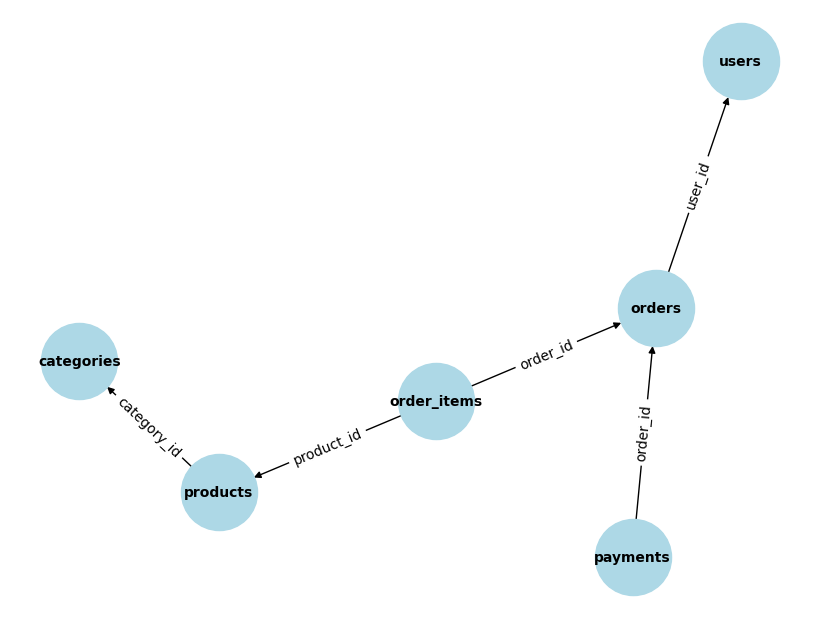

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.DiGraph()

# Add edges from relations DataFrame
for _, row in relations.iterrows():
    G.add_edge(row["Table"], row["References Table"], label=row["Column"])

# Draw
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


In [144]:
# 1. Get all tables
cursor.execute("SHOW TABLES;")
tables = [t[0] for t in cursor.fetchall()]
print("Tables in database:", tables,'\n')
for table in tables:
    print(table, ' :')
    table_des = f'DESCRIBE {table}'
    cursor.execute(table_des)
    columns = cursor.fetchall()
    
    print(f"\nStructure of {table} table:")
    for column in columns:
        print(column)
        
    print("#"*70)

Tables in database: ['categories', 'order_items', 'orders', 'payments', 'products', 'users'] 

categories  :

Structure of categories table:
('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('category_name', 'varchar(50)', 'YES', '', None, '')
######################################################################
order_items  :

Structure of order_items table:
('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('order_id', 'int', 'YES', 'MUL', None, '')
('product_id', 'int', 'YES', 'MUL', None, '')
('quantity', 'int', 'YES', '', None, '')
('price_each', 'decimal(10,2)', 'YES', '', None, '')
######################################################################
orders  :

Structure of orders table:
('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('user_id', 'int', 'YES', 'MUL', None, '')
('order_date', 'datetime', 'YES', '', None, '')
('status', "enum('pending','shipped','delivered','cancelled')", 'YES', '', None, '')
################################################################

In [121]:
cursor.execute("SELECT * FROM users")
rows = cursor.fetchall()
for row in rows:
    print(row)

(1, 'ali123', 'ali@example.com', datetime.date(2023, 1, 10))
(2, 'sara_k', 'sara@example.com', datetime.date(2023, 3, 15))


# Insert data into categories table

In [38]:
import pandas as pd

# Create a DataFrame with category names
df_categories = pd.DataFrame({
    "category_name": ["Electronics", "Books", "Clothing"]
})

# Save to CSV
df_categories.to_csv("categories.csv", index=False)
print("CSV file 'categories.csv' created!")
df_categories

CSV file 'categories.csv' created!


,category_name
0,Electronics
1,Books
2,Clothing


In [39]:
# Read CSV
df = pd.read_csv("categories.csv")
table_name = 'categories'
# Prepare insert query
query_categories = f"""
INSERT INTO {table_name} (category_name)
VALUES (%s)
"""

# Convert DataFrame to list of tuples
value_categories = [(x,) for x in df['category_name']]
print(value_categories)

# Execute many rows at once
cuxm(query_categories, value_categories)
db.commit()

print(cursor.rowcount, "rows inserted into category table.")

# Verify
cux(f"SELECT * FROM {table_name} ")
rows = cursor.fetchall()
for row in rows:
    print(row)

[('Electronics',), ('Books',), ('Clothing',)]
3 rows inserted into category table.
(1, 'Electronics')
(2, 'Books')
(3, 'Clothing')


# Insert data into products table

In [40]:
import pandas as pd
products = {
    "product_name": ["Laptop HP", "The Great Gatsby", "T-Shirt Black"],
    "price": [800.00, 15.00, 10.00],
    "stock": [10, 50, 100],
    "category_id": [1, 2, 3]
}
# Create a DataFrame with your product data
df_products = pd.DataFrame(products)

# Save it as CSV
df_products.to_csv("products.csv", index=False)
print("CSV file 'products.csv' created!")
df_products


CSV file 'products.csv' created!


,product_name,price,stock,category_id
0,Laptop HP,800.0,10,1
1,The Great Gatsby,15.0,50,2
2,T-Shirt Black,10.0,100,3


In [41]:
# Read CSV
df = pd.read_csv("products.csv")
# Convert DataFrame to list of tuples
product_values = [tuple(x) for x in df.to_numpy()]


table_name = 'products'

# Data insert to columns
data_columns = """
                    (product_name, price, stock, category_id)
"""

# SQL query with placeholders (%s)
query_products = f"""
INSERT INTO {table_name} {data_columns}
VALUES (%s, %s, %s, %s)
"""

# Execute many rows at once
cuxm(query_products, product_values)

db.commit()

print(cursor.rowcount, "rows inserted.\n")

# Verify
cux(f"SELECT * FROM {table_name} ")
rows = cursor.fetchall()
for row in rows:
    print(row)

3 rows inserted.

(1, 'Laptop HP', Decimal('800.00'), 10, 1)
(2, 'The Great Gatsby', Decimal('15.00'), 50, 2)
(3, 'T-Shirt Black', Decimal('10.00'), 100, 3)


# Insert data into orders table

In [42]:
from datetime import datetime 

table_name = 'orders'

# SQL query with placeholders (%s)
query_orders = f"""
INSERT INTO {table_name} (user_id, order_date, status)
VALUES (%s,%s,%s)
"""
# Data to insert (list of tuples)


value_orders =[
    (1, datetime.now(), 'pending'),
    (2, datetime.now(), 'pending')
    ]
# Execute many rows at once
cuxm(query_orders , value_orders)

# Commit changes
db.commit()

print(cursor.rowcount, "rows inserted.")



# Verify
cux(f"SELECT * FROM {table_name} ")
rows = cursor.fetchall()
for row in rows:
    print(row)

2 rows inserted.
(1, 1, datetime.datetime(2025, 8, 29, 21, 45, 6), 'pending')
(2, 2, datetime.datetime(2025, 8, 29, 21, 45, 6), 'pending')


# Insert data into order_items table

In [43]:
table_name = 'order_items'

# Data insert to columns
data_columns = "(order_id, product_id, quantity, price_each)"

# SQL query with placeholders (%s)
query_order_items = f"""
INSERT INTO {table_name} {data_columns}
VALUES (%s,%s,%s,%s)
"""

# ✅ Data to insert (list of tuples)
value_order_items = [
    (1, 1, 1, 800.00),
    (1, 2, 2, 15.00),
    (2, 3, 3, 10.00)
]

# Execute many rows at once
cuxm(query_order_items, value_order_items)

# Commit changes
db.commit()

print(cursor.rowcount, "rows inserted.")

# Verify
cursor.execute("SELECT * FROM order_items")
rows = cursor.fetchall()
for row in rows:
    print(row)


3 rows inserted.
(1, 1, 1, 1, Decimal('800.00'))
(2, 1, 2, 2, Decimal('15.00'))
(3, 2, 3, 3, Decimal('10.00'))


# Insert data into payments table

In [44]:

# SQL query with placeholders (%s)
query_payments = """
INSERT INTO payments (order_id, payment_date, amount, method, status)
VALUES (%s,%s,%s,%s,%s)
"""
# Data to insert (list of tuples)

from datetime import datetime 
value_payments =[
    (1, datetime.now(), 830.00, 'credit_card', 'paid'),
    (2, datetime.now(), 30.00, 'cash', 'paid')
    ]
# Execute many rows at once
cursor.executemany(query_payments , value_payments)

# Commit changes
db.commit()

print(cursor.rowcount, "rows inserted.")

cursor.execute("SELECT * FROM payments")
rows = cursor.fetchall()
for row in rows:
    print(row)


2 rows inserted.
(1, 1, datetime.datetime(2025, 8, 29, 21, 45, 10), Decimal('830.00'), 'credit_card', 'paid')
(2, 2, datetime.datetime(2025, 8, 29, 21, 45, 10), Decimal('30.00'), 'cash', 'paid')


In [46]:
from mysql.connector  import connect
db = connect(
    host='localhost',
    user='hamed',
    password='NewPass123!',
    database='online_shop')
if db.is_connected():
    print("Connected to mysql server")

Connected to mysql server


# Report

In [47]:
# 1. Get all tables
cursor.execute("SHOW TABLES;")
tables = [t[0] for t in cursor.fetchall()]
print("Tables in database:", tables,'\n')
for table in tables:
    print(table, ' :')
    table_des = f'DESCRIBE {table}'
    cursor.execute(table_des)
    columns = cursor.fetchall()
    
    print(f"\nStructure of {table} table:")
    for column in columns:
        print(column)
        
    print("#"*70)

Tables in database: ['categories', 'order_items', 'orders', 'payments', 'products', 'users'] 

categories  :

Structure of categories table:
('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('category_name', 'varchar(50)', 'YES', '', None, '')
######################################################################
order_items  :

Structure of order_items table:
('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('order_id', 'int', 'YES', 'MUL', None, '')
('product_id', 'int', 'YES', 'MUL', None, '')
('quantity', 'int', 'YES', '', None, '')
('price_each', 'decimal(10,2)', 'YES', '', None, '')
######################################################################
orders  :

Structure of orders table:
('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('user_id', 'int', 'YES', 'MUL', None, '')
('order_date', 'datetime', 'YES', '', None, '')
('status', "enum('pending','shipped','delivered','cancelled')", 'YES', '', None, '')
################################################################

In [48]:
cursor = db.cursor()

# Define a query  for all orders list with total amount
query = """
SELECT o.id, u.username, order_date, SUM(oi.quantity * oi.price_each) AS total_amount
FROM orders AS o
JOIN users AS u ON o.user_id = u.id
JOIN order_items AS oi ON o.id = oi.order_id
GROUP BY o.id;
"""

# Execute the query
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

# Print results
for row in results:
    print(row)

# Convert to pandas DataFrame
df = pd.DataFrame(results, columns=['Order_ID', 'Username', 'Order_date', 'total_amount'])

# Display the DataFrame
df

(1, 'ali123', datetime.datetime(2025, 8, 29, 21, 45, 6), Decimal('830.00'))
(2, 'sara_k', datetime.datetime(2025, 8, 29, 21, 45, 6), Decimal('30.00'))


,Order_ID,Username,Order_date,total_amount
0,1,ali123,2025-08-29 21:45:06,830.00
1,2,sara_k,2025-08-29 21:45:06,30.00


In [49]:
import pandas as pd

# Define a query  for selling report
'''Tables name

category
order_items
orders
payments
products
users

'''
query = """
SELECT p.product_name, sum(oi.quantity) AS total_sold FROM order_items AS oi
JOIN products AS p ON oi.product_id = p.id

GROUP BY p.product_name
order by total_sold desc;
"""

# Execute the query
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

# Print results
for row in results:
    print(row)

# Convert to pandas DataFrame
df = pd.DataFrame(results, columns=['Product Name', 'Total Sold'])

# Display the DataFrame
df

('T-Shirt Black', Decimal('3'))
('The Great Gatsby', Decimal('2'))
('Laptop HP', Decimal('1'))


,Product Name,Total Sold
0,T-Shirt Black,3
1,The Great Gatsby,2
2,Laptop HP,1


In [51]:
# Best-selling products report
import pandas as pd


query = """
SELECT p.product_name, p.stock, sum(oi.quantity) AS sold FROM products AS p
JOIN order_items AS oi ON p.id = oi.product_id

GROUP BY p.product_name, p.stock
order by sold desc;
"""

# Execute the query
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

# Print results
for row in results:
    print(row)

# Convert to pandas DataFrame
df = pd.DataFrame(results, columns=['Product Name', 'Stock','Sold'])

# Display the DataFrame
print(df)

# Optionally, save to Excel or CSV
#df.to_excel('selling_report.xlsx', index=False)
#df.to_csv('selling_report.csv', index=False)    

('T-Shirt Black', 100, Decimal('3'))
('The Great Gatsby', 50, Decimal('2'))
('Laptop HP', 10, Decimal('1'))
       Product Name  Stock Sold
0     T-Shirt Black    100    3
1  The Great Gatsby     50    2
2         Laptop HP     10    1


In [52]:
# BUsers with most orders report
import pandas as pd


query = """
SELECT  u.username, count(*) AS total_orders FROM orders AS o
JOIN users AS u ON o.user_id = u.id

GROUP BY u.id
order by total_orders desc;
"""

# Execute the query
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

# Print results
for row in results:
    print(row)

# Convert to pandas DataFrame
df = pd.DataFrame(results, columns=['UserName', 'Total Orders'])

# Display the DataFrame
print(df)

# Optionally, save to Excel or CSV
#df.to_excel('selling_report.xlsx', index=False)
#df.to_csv('selling_report.csv', index=False)    

('ali123', 1)
('sara_k', 1)
  UserName  Total Orders
0   ali123             1
1   sara_k             1


In [53]:
cursor.close()
db.close()
print("MySQL connection closed")

MySQL connection closed
